<a href="https://colab.research.google.com/github/tsangrebecca/BloomTech/blob/main/Sprint3/Module2/O1_ModelTheRelationshipOfMultiplePredictorVariablesToASingleOutcome.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns

# Load the car crash dataset
crashes = sns.load_dataset("car_crashes")

crashes.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [2]:
import seaborn as sns
from statsmodels.formula.api import ols

crashes = sns.load_dataset("car_crashes")

# set up and fit the model in one step
model = ols("total ~ alcohol", data=crashes).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     130.5
Date:                Sat, 26 Aug 2023   Prob (F-statistic):           2.04e-15
Time:                        01:47:46   Log-Likelihood:                -110.99
No. Observations:                  51   AIC:                             226.0
Df Residuals:                      49   BIC:                             229.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8578      0.921      6.357      0.0

R-squared represents the proportion of variance for a dependent variable explained by an independent variable. 73% of variance in total accidents is explained by alcohol, the other 27% might be explained by other variables such as speeding, not_distracted, etc.

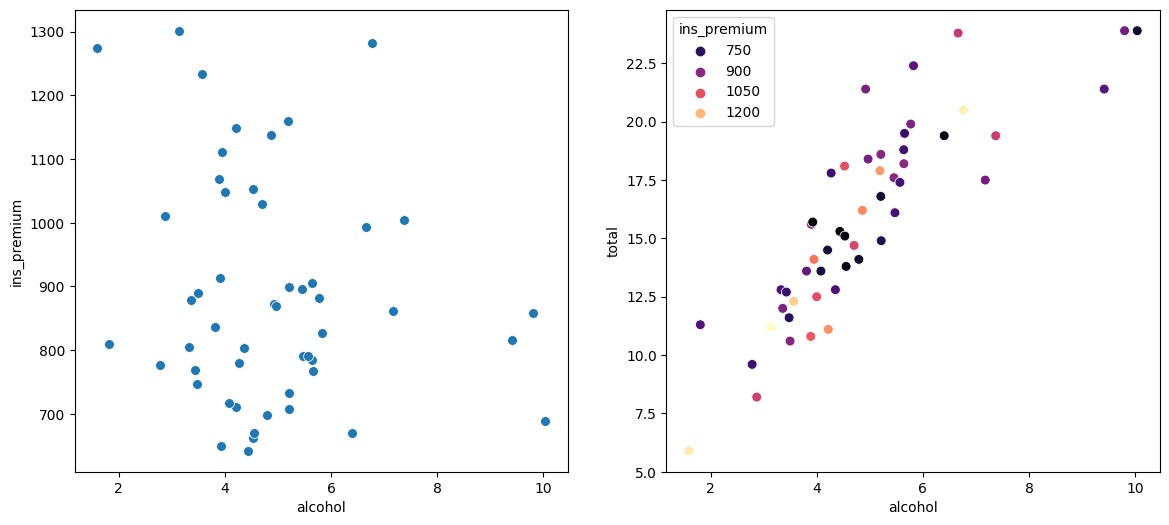

In [3]:
import matplotlib.pyplot as plt

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(14,6))

# Compare the two independent variables to each other - are they related?
sns.scatterplot(x='alcohol', y='ins_premium', data=crashes, s=50, ax=ax1)

# The color now represents the insurance premium
sns.scatterplot(x='alcohol', y='total', hue='ins_premium', data=crashes, s=50, palette='magma', ax=ax2)

plt.show()

In [4]:
# NEW model with 2 independent variables:
model = ols('total ~ alcohol + speeding', data=crashes).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     64.87
Date:                Sat, 26 Aug 2023   Prob (F-statistic):           2.27e-14
Time:                        01:55:29   Log-Likelihood:                -110.71
No. Observations:                  51   AIC:                             227.4
Df Residuals:                      48   BIC:                             233.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.6807      0.957      5.934      0.0